In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("Walmart.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df["Year"] = df["Date"].str[-4:]
df["Month"] = df["Date"].str[3:5]
df["Day"] = df["Date"].str[0:2]

In [7]:
df["date"]=pd.to_datetime(df["Year"].astype(str)+"--"+df["Month"].astype(str)+"--"+df["Day"])

In [8]:
df.drop("Date",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Weekly_Sales  6435 non-null   float64       
 2   Holiday_Flag  6435 non-null   int64         
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
 7   Year          6435 non-null   object        
 8   Month         6435 non-null   object        
 9   Day           6435 non-null   object        
 10  date          6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 553.1+ KB


In [10]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,date
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05,2010-02-05
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12,2010-02-12
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19,2010-02-19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26,2010-02-26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,05,2010-03-05


In [11]:
for i in df.columns:
    a=(df[i]==" ").sum()     # to check for any space value 
    if a>0:
        print("space values are there")
    else:
        print("No space values are there")

No space values are there
No space values are there
No space values are there
No space values are there
No space values are there
No space values are there
No space values are there
No space values are there
No space values are there
No space values are there
No space values are there


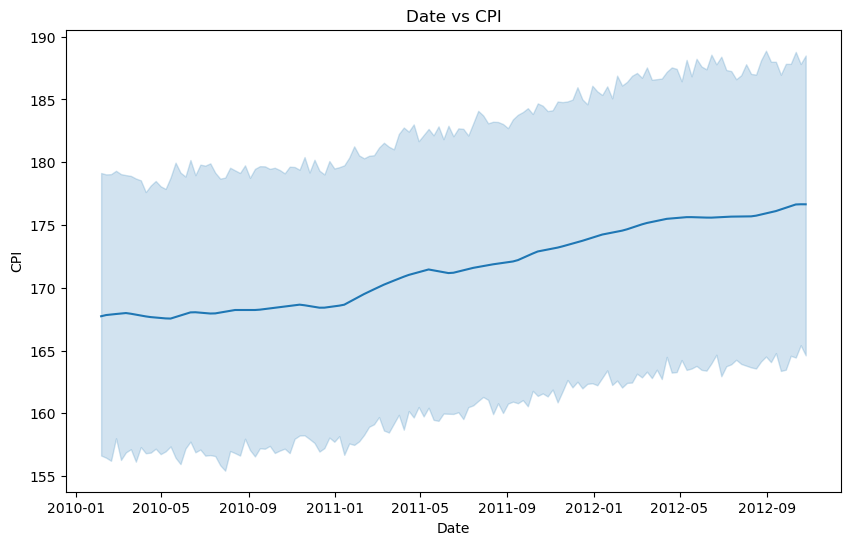

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x="date",y="CPI",data=df)
plt.title("Date vs CPI")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.show()

In [13]:
Total_sales=df.groupby("Store")["Weekly_Sales"].sum().round(2)

In [14]:
Total_sales = Total_sales.map('{:.2f}'.format)

In [15]:
Total_sales

Store
1     222402808.85
2     275382440.98
3      57586735.07
4     299543953.38
5      45475688.90
6     223756130.64
7      81598275.14
8     129951181.13
9      77789218.99
10    271617713.89
11    193962786.80
12    144287230.15
13    286517703.80
14    288999911.34
15     89133683.92
16     74252425.40
17    127782138.83
18    155114734.21
19    206634862.10
20    301397792.46
21    108117878.92
22    147075648.57
23    198750617.85
24    194016021.28
25    101061179.17
26    143416393.79
27    253855916.88
28    189263680.58
29     77141554.31
30     62716885.12
31    199613905.50
32    166819246.16
33     37160221.96
34    138249763.00
35    131520672.08
36     53412214.97
37     74202740.32
38     55159626.42
39    207445542.47
40    137870309.79
41    181341934.89
42     79565752.43
43     90565435.41
44     43293087.84
45    112395341.42
Name: Weekly_Sales, dtype: object

In [16]:
Total_sales = Total_sales.sort_values(ascending=False)

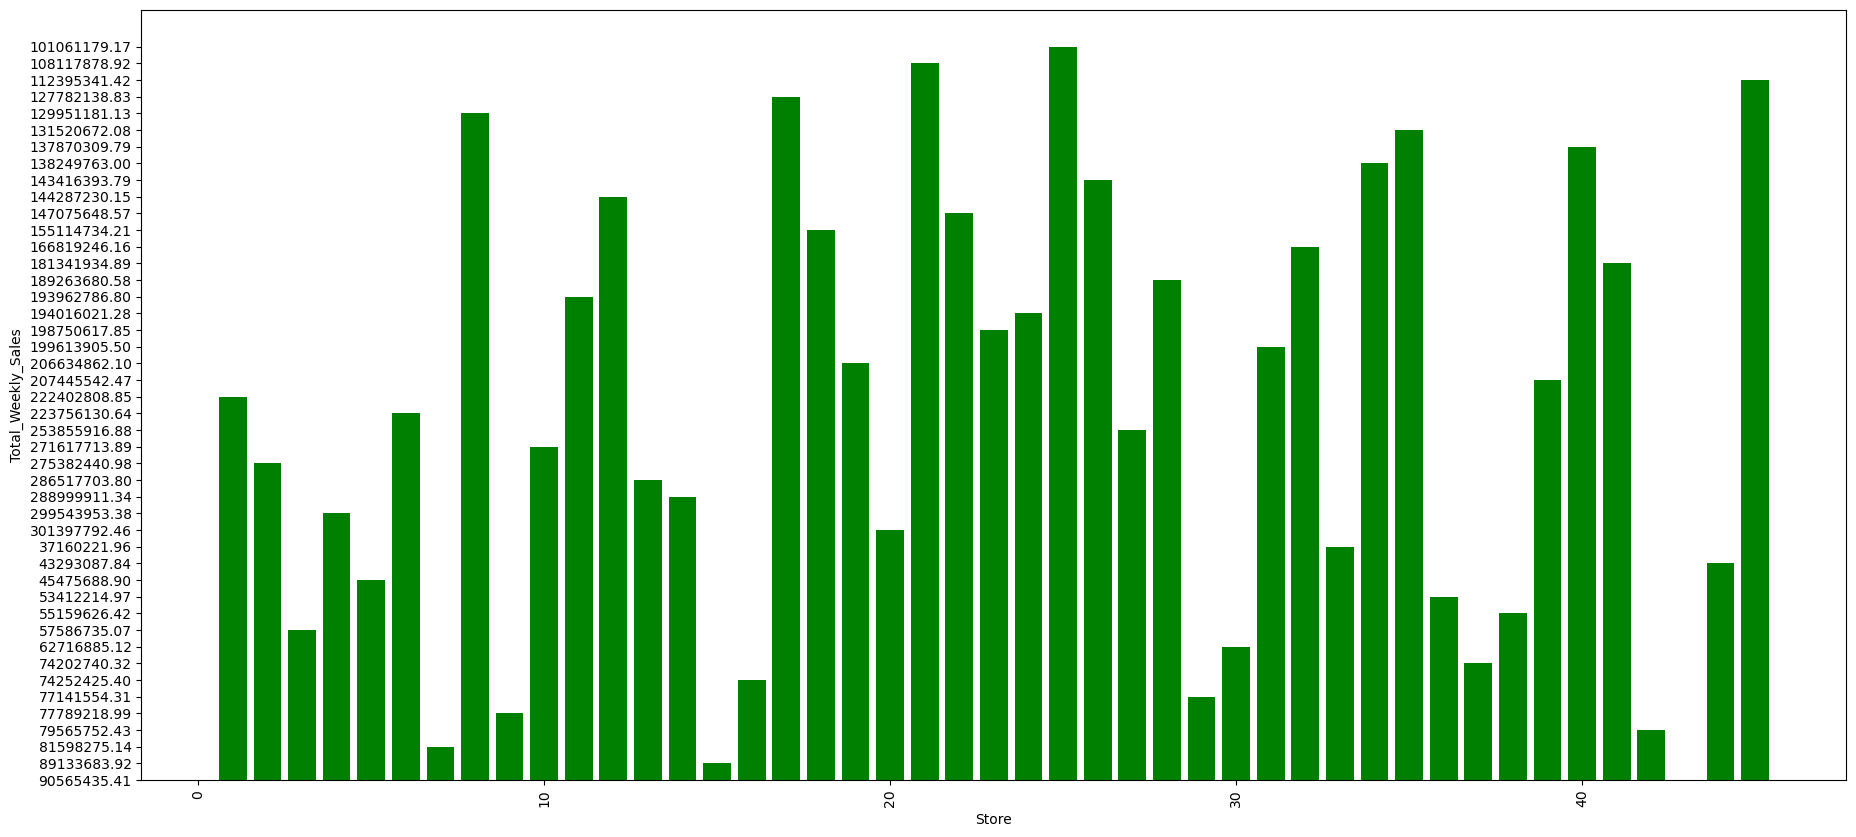

In [17]:
plt.figure(figsize=(22, 10))  
plt.bar(Total_sales.index, Total_sales.values, color='green')
plt.xlabel("Store")
plt.ylabel("Total_Weekly_Sales")
plt.xticks(rotation=90)
plt.show()

In [18]:
Total_sales.max()

'90565435.41'

In [19]:
Total_sales.min()

'101061179.17'

In [20]:
Total_sales

Store
43     90565435.41
15     89133683.92
7      81598275.14
42     79565752.43
9      77789218.99
29     77141554.31
16     74252425.40
37     74202740.32
30     62716885.12
3      57586735.07
38     55159626.42
36     53412214.97
5      45475688.90
44     43293087.84
33     37160221.96
20    301397792.46
4     299543953.38
14    288999911.34
13    286517703.80
2     275382440.98
10    271617713.89
27    253855916.88
6     223756130.64
1     222402808.85
39    207445542.47
19    206634862.10
31    199613905.50
23    198750617.85
24    194016021.28
11    193962786.80
28    189263680.58
41    181341934.89
32    166819246.16
18    155114734.21
22    147075648.57
12    144287230.15
26    143416393.79
34    138249763.00
40    137870309.79
35    131520672.08
8     129951181.13
17    127782138.83
45    112395341.42
21    108117878.92
25    101061179.17
Name: Weekly_Sales, dtype: object

In [21]:
avg_sales=df.groupby("Store")["Weekly_Sales"].mean().round(2)

In [22]:
avg_sales

Store
1     1555264.40
2     1925751.34
3      402704.44
4     2094712.96
5      318011.81
6     1564728.19
7      570617.31
8      908749.52
9      543980.55
10    1899424.57
11    1356383.12
12    1009001.61
13    2003620.31
14    2020978.40
15     623312.47
16     519247.73
17     893581.39
18    1084718.42
19    1444999.04
20    2107676.87
21     756069.08
22    1028501.04
23    1389864.46
24    1356755.39
25     706721.53
26    1002911.84
27    1775216.20
28    1323522.24
29     539451.43
30     438579.62
31    1395901.44
32    1166568.15
33     259861.69
34     966781.56
35     919724.98
36     373511.99
37     518900.28
38     385731.65
39    1450668.13
40     964128.04
41    1268125.42
42     556403.86
43     633324.72
44     302748.87
45     785981.41
Name: Weekly_Sales, dtype: float64

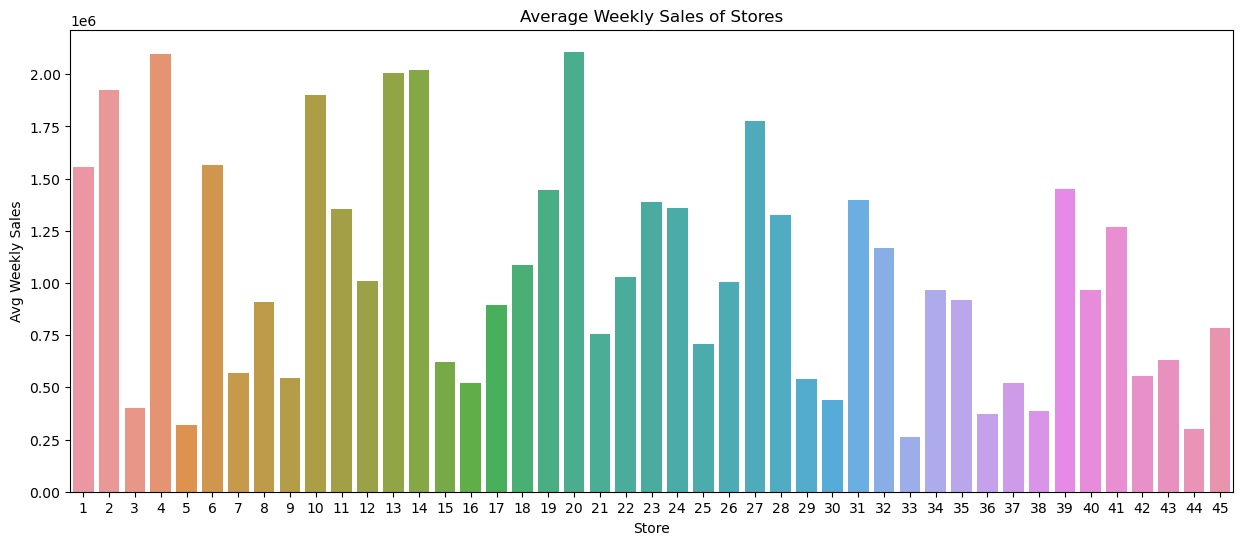

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x=avg_sales.index,y=avg_sales.values)
plt.title("Average Weekly Sales of Stores")
plt.xlabel("Store")
plt.ylabel("Avg Weekly Sales")
plt.show()

In [24]:
avg_sales.max()

2107676.87

In [25]:
avg_sales.min()

259861.69

In [26]:
avg_sales.max()-avg_sales.min()

1847815.1800000002

# Top 5 best stores according to average sales are - store no-4,20,2,13,14
# Worst 5 stores according to average sales are - store no-33,5,44,3,36

# The difference of average weekly Sales  between best and worst store is 187815.18

In [27]:
#According to the graph during the month of march,april and may sales vales are going up 
# During the Dec and January the sales the sales are comparatively down 

C:\Users\samad\AppData\Local\Temp\ipykernel_66104\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

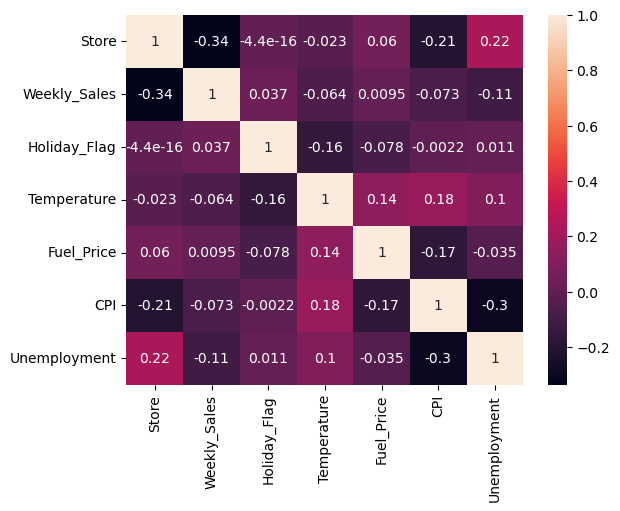

In [28]:
sns.heatmap(df.corr(),annot=True)

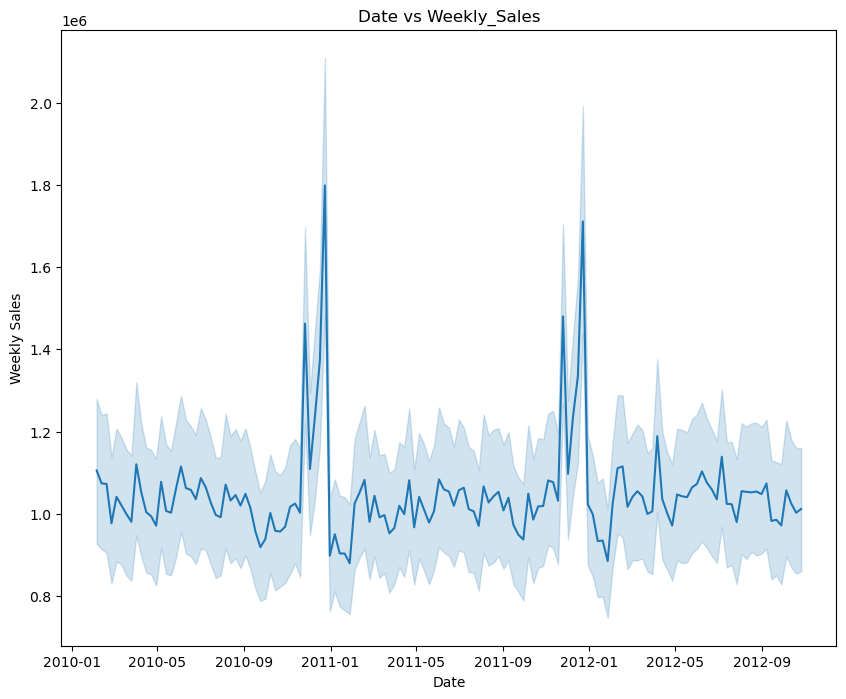

In [29]:
plt.figure(figsize=(10,8))
sns.lineplot(x="date",y="Weekly_Sales",data=df)
plt.title("Date vs Weekly_Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

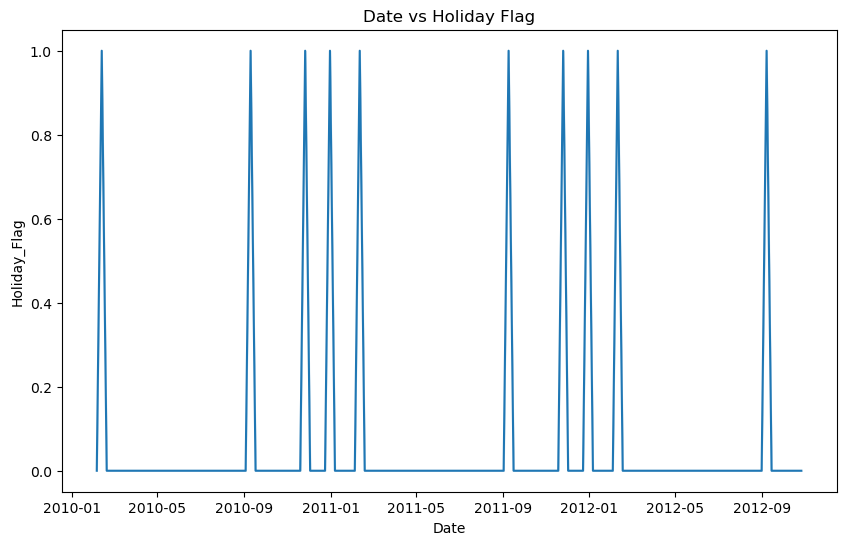

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(x="date",y="Holiday_Flag",data=df)
plt.title("Date vs Holiday Flag")
plt.xlabel("Date")
plt.ylabel("Holiday_Flag")
plt.show()

In [31]:
# As we have seen that on the dec nd jan month the holiday flags are there so sales are high at those months 

In [32]:
# The weekly Sales shows a seasonal trend that at Winter season for the Holiday Flags the sales va;ues are increasing 

In [33]:
unemp_sales=df.groupby("Store").agg({"Weekly_Sales":"mean","Unemployment":"mean"}).round(2)

In [34]:
unemp_sales=unemp_sales.sort_values(by="Weekly_Sales")

In [35]:
unemp_sales

,Weekly_Sales,Unemployment
Store,,
33,259861.69,8.53
44,302748.87,6.74
5,318011.81,6.30
36,373511.99,7.87
38,385731.65,13.12
3,402704.44,7.18
30,438579.62,7.62
37,518900.28,7.87
16,519247.73,6.48


<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

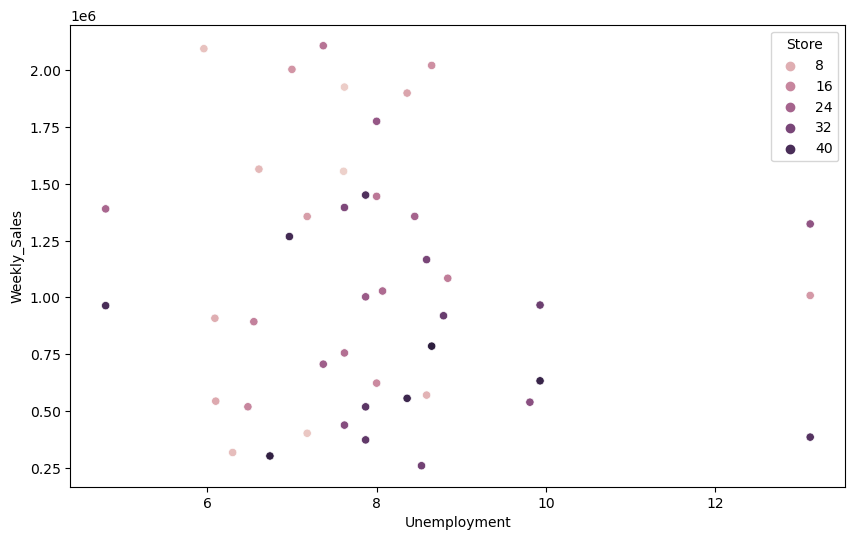

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Unemployment",y="Weekly_Sales",hue="Store",data=unemp_sales)

In [37]:
# It is seen that there is no  particular relation between unemployment and Weekly Sales 

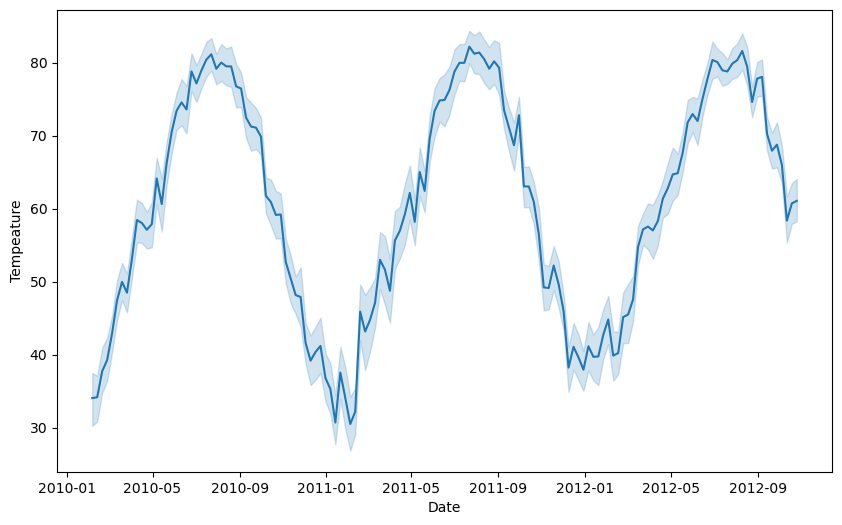

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x="date",y="Temperature",data=df)
plt.xlabel("Date")
plt.ylabel("Tempeature")
plt.show()

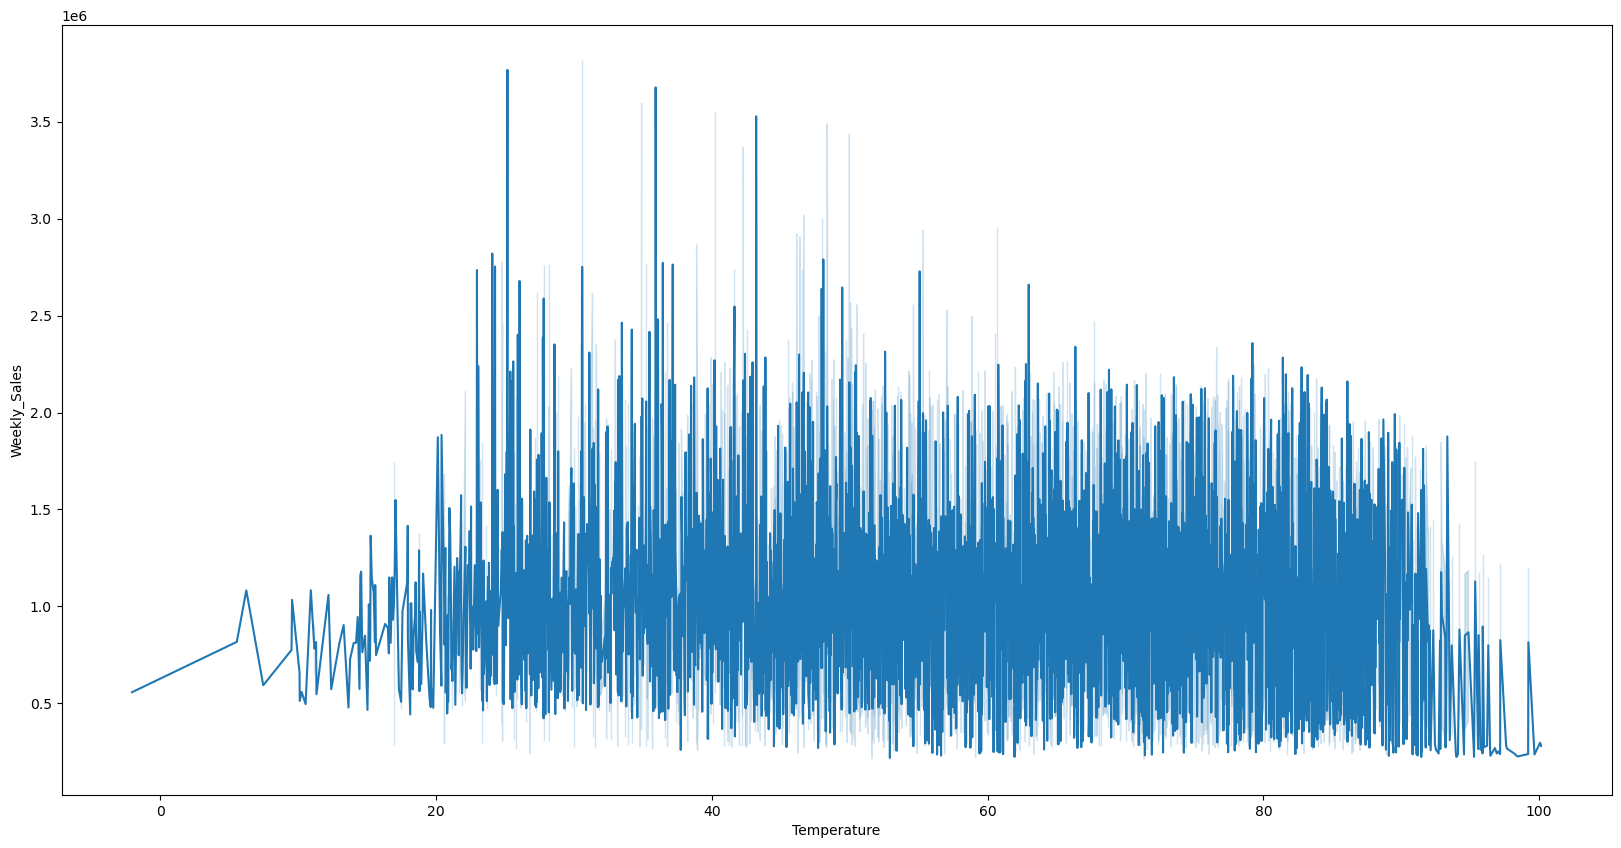

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Temperature",y="Weekly_Sales",data=df)
plt.xlabel("Temperature")
plt.ylabel("Weekly_Sales")
plt.show()

In [68]:
Temp_sales=df.groupby("Store").agg({"Weekly_Sales":"mean","Temperature":"mean"}).round(2)

In [69]:
Temp_sales=Temp_sales.sort_values(by="Weekly_Sales")

In [71]:
Temp_sales.head()

,Weekly_Sales,Temperature
Store,,
33,259861.69,76.73
44,302748.87,53.70
5,318011.81,69.41
36,373511.99,71.16
38,385731.65,70.26


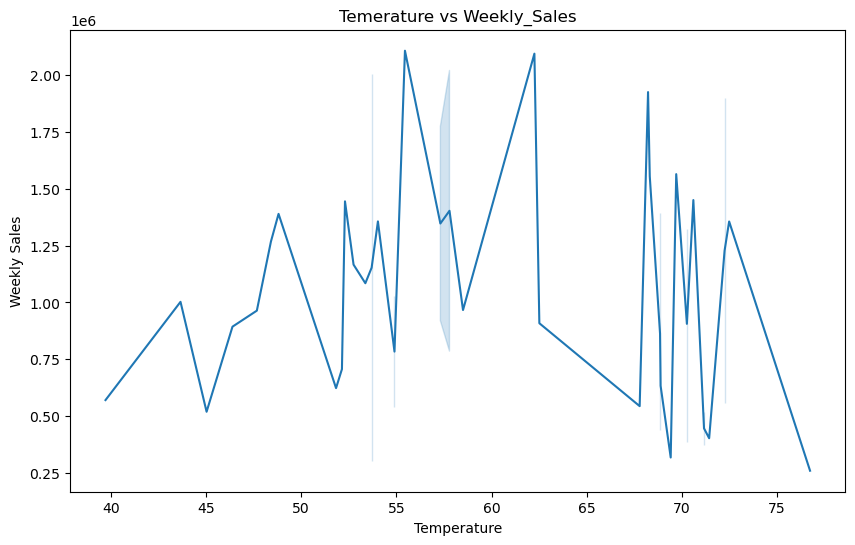

In [72]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Temperature",y="Weekly_Sales",data=Temp_sales)
plt.title("Temerature vs Weekly_Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

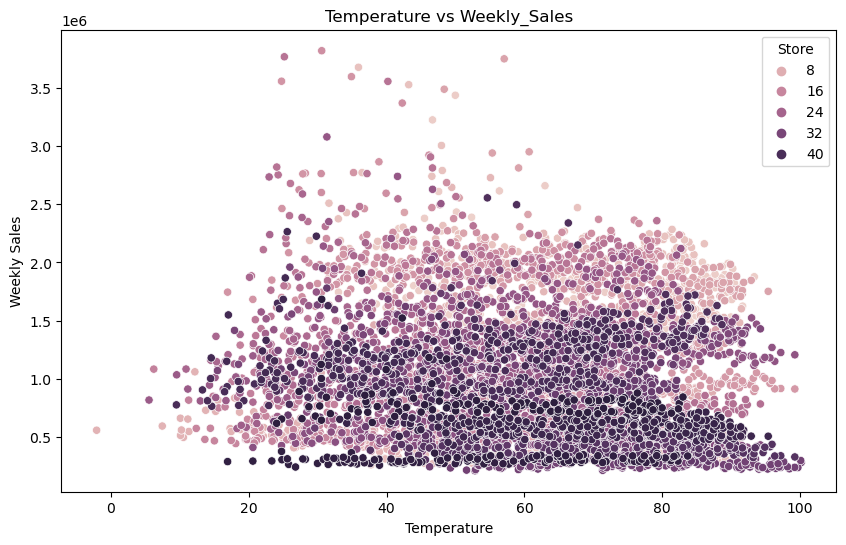

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Temperature",y="Weekly_Sales",hue="Store",data=df)
plt.title("Temperature vs Weekly_Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.show()

In [40]:
# During Sales hike time the Temperature is relatively low that can be an addition to the high sales on those months along with the Holiday Flag 
# as per the heatmap the weekly sales is not effected by the temperature

In [41]:
CPI_SALES=df.groupby("Store").agg({"Weekly_Sales":"mean","CPI":"mean"}).round(2)

In [42]:
CPI_SALES=CPI_SALES.sort_values(by="Weekly_Sales")

In [43]:
CPI_SALES

,Weekly_Sales,CPI
Store,,
33,259861.69,128.68
44,302748.87,128.68
5,318011.81,216.57
36,373511.99,214.73
38,385731.65,128.68
3,402704.44,219.39
30,438579.62,215.65
37,518900.28,214.73
16,519247.73,193.66


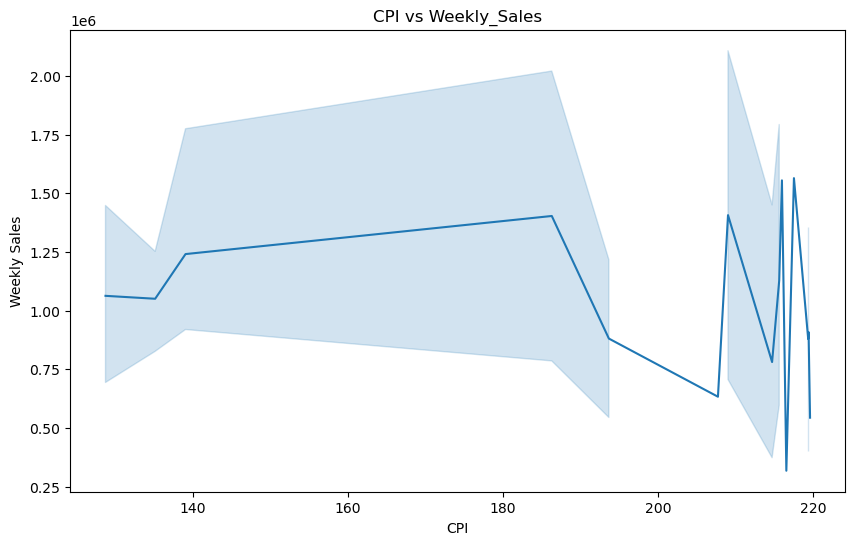

In [44]:

plt.figure(figsize=(10,6))
sns.lineplot(x="CPI",y="Weekly_Sales",data=CPI_SALES)
plt.title("CPI vs Weekly_Sales")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.show()

 # There is no realtion found between CPI and Weekly_sales for different stores as values are randomly increasing and dectreasing 

In [45]:
# EDA of one least performing store 

In [46]:
dv=df[df["Store"]==33]

In [47]:
dv.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,date
4576,33,274593.43,0,58.40,2.962,126.442065,10.115,2010,02,05,2010-02-05
4577,33,294882.83,1,55.47,2.828,126.496258,10.115,2010,02,12,2010-02-12
4578,33,296850.83,0,62.16,2.915,126.526286,10.115,2010,02,19,2010-02-19
4579,33,284052.77,0,56.50,2.825,126.552286,10.115,2010,02,26,2010-02-26
4580,33,291484.89,0,59.17,2.877,126.578286,10.115,2010,03,05,2010-03-05


C:\Users\samad\AppData\Local\Temp\ipykernel_66104\2614936290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dv.corr(),annot=True)


<Axes: >

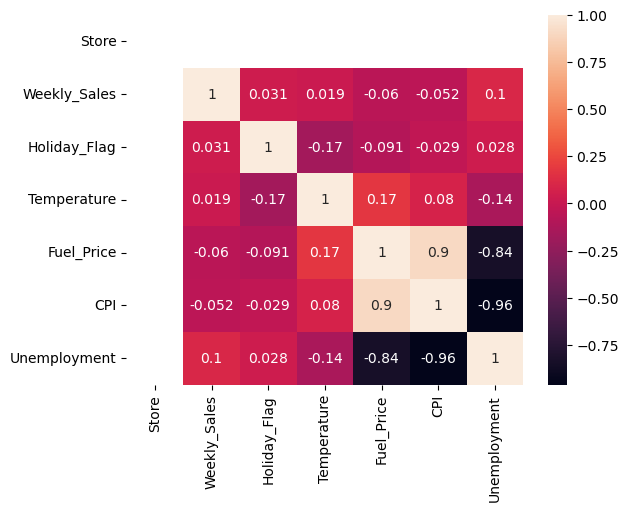

In [48]:
sns.heatmap(dv.corr(),annot=True)

In [49]:
Total_sales=dv.groupby("date")["Weekly_Sales"].sum().round(2)

In [50]:
Total_sales

date
2010-02-05    274593.43
2010-02-12    294882.83
2010-02-19    296850.83
2010-02-26    284052.77
2010-03-05    291484.89
                ...    
2012-09-28    242813.51
2012-10-05    265444.90
2012-10-12    291781.15
2012-10-19    254412.34
2012-10-26    253731.13
Name: Weekly_Sales, Length: 143, dtype: float64

<BarContainer object of 143 artists>

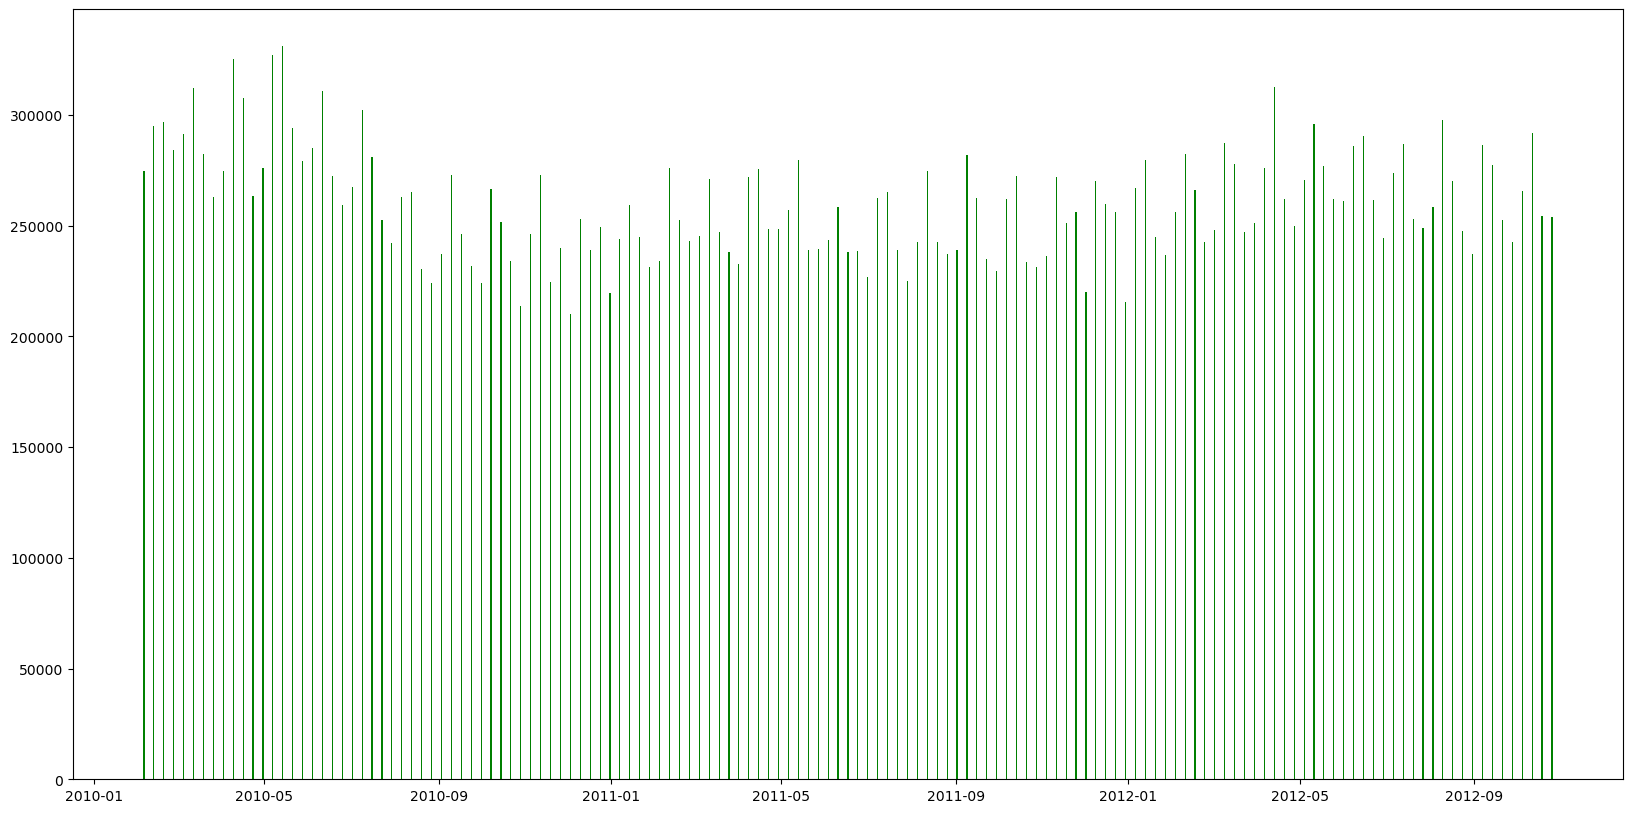

In [51]:
plt.figure(figsize=(20,10))
plt.bar(Total_sales.index, Total_sales.values, color='green')

In [52]:
unemploy=dv.groupby("date").agg({"Weekly_Sales":"sum", "Unemployment":"sum"}).round(2)

In [53]:
unemploy=unemploy.sort_values(by="Weekly_Sales")

In [54]:
unemploy

,Weekly_Sales,Unemployment
date,,
2010-12-03,209986.25,9.26
2010-10-29,213538.32,9.26
2011-12-30,215359.21,8.01
2010-12-31,219804.85,9.26
2011-12-02,220060.35,8.01
...,...,...
2010-03-12,312161.00,10.12
2012-04-13,312698.67,7.40
2010-04-09,325201.05,9.85


<Axes: xlabel='date', ylabel='Weekly_Sales'>

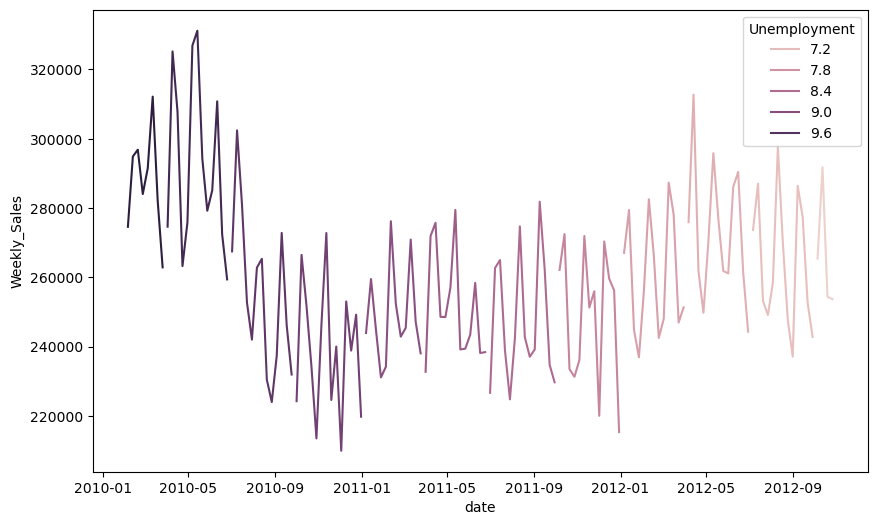

In [55]:
plt.figure(figsize=(10,6))
sns.lineplot(x="date",y="Weekly_Sales",hue="Unemployment",data=dv)

<Axes: xlabel='date', ylabel='Holiday_Flag'>

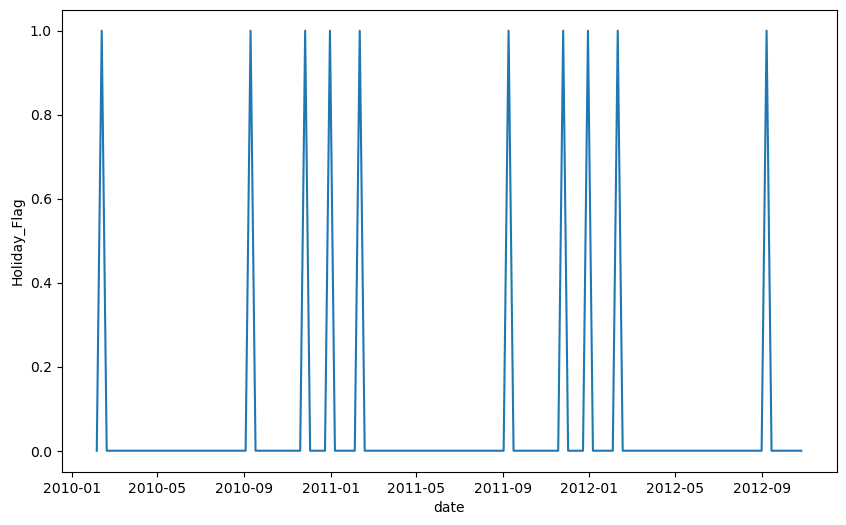

In [56]:
plt.figure(figsize=(10,6))
sns.lineplot(x="date",y="Holiday_Flag",data=dv)

In [57]:
# Here it has been seen that the unemployemnt is radnom  with the weekly_sales column for store no -33
# Here Hign unemployemnt the weekly_sales are sometimes dipping and also sometimes it is giving sikes in nature 
# The January month of 2010 was good year for store no 33 while after that the sales were decresing for some point 

<Axes: xlabel='date', ylabel='Weekly_Sales'>

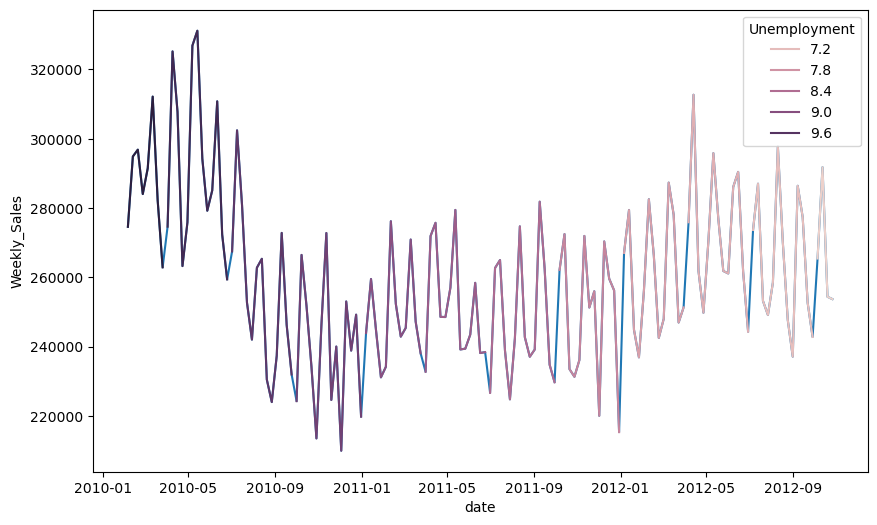

In [58]:
plt.figure(figsize=(10,6))
sns.lineplot(x="date",y="Weekly_Sales",data=dv)
sns.lineplot(x="date",y="Weekly_Sales",hue="Unemployment",data=dv)

In [59]:
fuel=dv.groupby("date").agg({"Weekly_Sales":"sum", "Fuel_Price":"sum"}).round(2)

In [60]:
fuel=fuel.sort_values(by="Weekly_Sales")

In [61]:
fuel

,Weekly_Sales,Fuel_Price
date,,
2010-12-03,209986.25,3.04
2010-10-29,213538.32,3.13
2011-12-30,215359.21,3.43
2010-12-31,219804.85,3.15
2011-12-02,220060.35,3.70
...,...,...
2010-03-12,312161.00,3.03
2012-04-13,312698.67,4.25
2010-04-09,325201.05,3.00


<Axes: xlabel='date', ylabel='Weekly_Sales'>

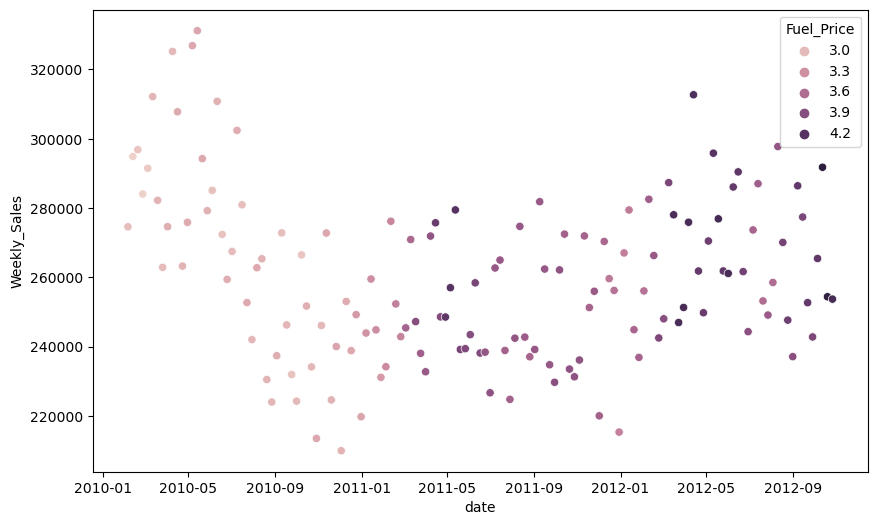

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="date",y="Weekly_Sales",hue="Fuel_Price",data=dv)

In [63]:
# Here it has been observed that the fuel price in Jan-2010 montgh relatively less and it may be one reason that Weekly_Sales is high on 2010-Jan 

In [64]:
Cpi=dv.groupby("date").agg({"Weekly_Sales":"sum", "CPI":"sum"}).round(2)

In [65]:
Cpi=Cpi.sort_values(by="Weekly_Sales")

<Axes: xlabel='date', ylabel='Weekly_Sales'>

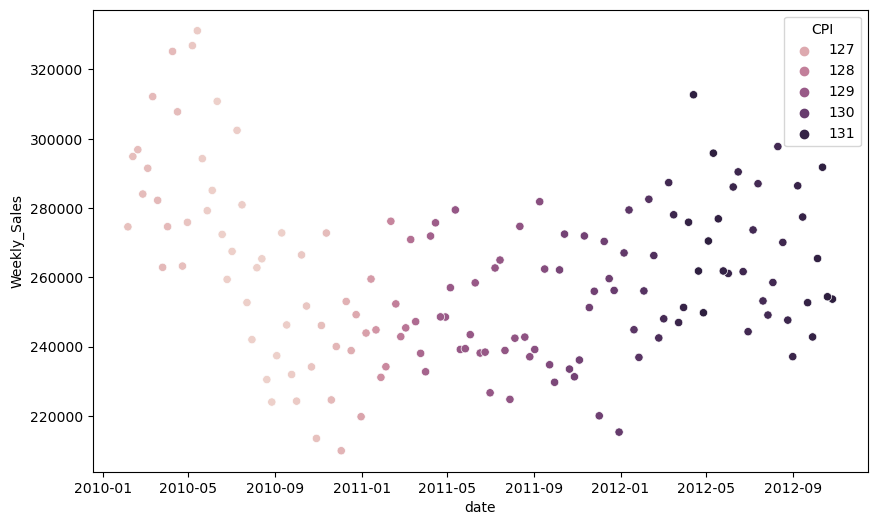

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="date",y="Weekly_Sales",hue="CPI",data=Cpi)

In [67]:
# Here it has been seen that the CPI (consumer Price index) has goofd relation with Weekly_Sales like Fuel_price,
#In Jan 2010 CPI and Fuel_price both are low And the Weejkly_Sales are high on that time period 